In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [2]:
#covid_crime_micro_geo_11_29_2021.csv
#precovid_crime_micro_geo_11_29_2021.csv

df = pd.read_csv('precovid_crime_micro_geo_11_29_2021.csv')
df.head()
#df = df.iloc[:, 1:]
df.columns

Index(['Unnamed: 0', 'SHIFT', 'OFFENSE', 'WARD', 'LATITUDE', 'LONGITUDE',
       'date', 'total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'MO', 'TU', 'WE', 'TH', 'FR', 'SA',
       'SU', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON',
       'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE',
       'THEFT F/AUTO', 'THEFT/OTHER', 'DAY', 'EVENING', 'MIDNIGHT',
       'distance_metro', 'distance_nightclubs', 'distance_worship'],
      dtype='object')

preprocessing

In [3]:
preDF = pd.read_csv('precovid_crime_micro_geo_11_29_2021.csv')
postDF = pd.read_csv('covid_crime_micro_geo_11_29_2021.csv')
preDF = preDF.iloc[:, 1:]
postDF = postDF.iloc[:, 1:]
preDF = preDF.drop(columns = ['total_cases', 'SHIFT', 'OFFENSE', 'date', 'LATITUDE', 'LONGITUDE', 
                                                     'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 
                                                     'ward_6', 'ward_7', 'ward_8'])
postDF = postDF.drop(columns = ['SHIFT', 'OFFENSE', 'date', 'LATITUDE', 'LONGITUDE', 'total_cases', 
                                            'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 'ward_6', 
                                            'ward_7', 'ward_8'])
#print(postDF.columns)
#print(preDF.columns)


#preDF = pd.read_csv('preCovid_crime.csv', usecols = range(1,25))
#postDF = pd.read_csv('Covid_crime.csv', usecols = range(1,25))
#preDF['year'] = pd.DatetimeIndex(preDF['date']).year
#preDF['month'] = pd.DatetimeIndex(preDF['date']).month
#preDF['day'] = pd.DatetimeIndex(preDF['date']).day
#preDF['covid_daily_case_count'] = 0
#preDF['covid_deaths'] = 0
#postDF['year'] = pd.DatetimeIndex(postDF['date']).year
#postDF['month'] = pd.DatetimeIndex(postDF['date']).month
#postDF['day'] = pd.DatetimeIndex(postDF['date']).day
#preDF = pd.get_dummies(preDF, columns = ['SHIFT', 'METHOD', 'OFFENSE'], prefix = ['shift','method','offense'])
#postDF = pd.get_dummies(postDF, columns = ['SHIFT', 'METHOD', 'OFFENSE'], prefix = ['shift','method','offense'])

split pre-covid

In [4]:
preX = preDF.loc[:, preDF.columns != 'WARD'].values
preY = preDF['WARD'].values


pre_x_train, pre_x_test, pre_y_train, pre_y_test = train_test_split(preX, preY, test_size = .2, random_state = 12345)

split during/post-covid

In [5]:
postX = postDF.loc[:, postDF.columns != 'WARD'].values
postY = postDF['WARD'].values


post_x_train, post_x_test, post_y_train, post_y_test = train_test_split(postX, postY, test_size = .2, random_state = 12345)

In [6]:
preclf = RandomForestClassifier(n_estimators = 800, max_depth = 5)
postclf = RandomForestClassifier(n_estimators = 800, max_depth = 5)

#preclf.fit(preX, preY.ravel())
#postclf.fit(postX, postY.ravel())
preclf.fit(pre_x_train, pre_y_train.ravel())
postclf.fit(post_x_train, post_y_train.ravel())

RandomForestClassifier(max_depth=5, n_estimators=800)

# Pre Importances

<AxesSubplot:>

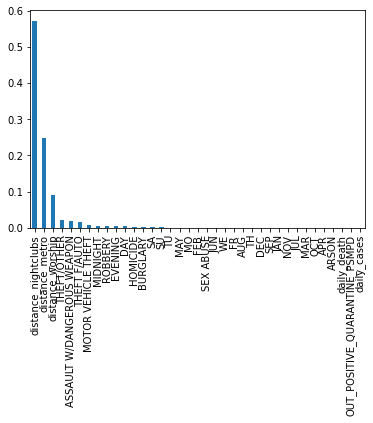

In [7]:
importance = pd.Series(preclf.feature_importances_, index = preDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [8]:
importance

distance_nightclubs              0.573400
distance_metro                   0.248969
distance_worship                 0.090599
THEFT/OTHER                      0.021383
ASSAULT W/DANGEROUS WEAPON       0.017491
THEFT F/AUTO                     0.014570
MOTOR VEHICLE THEFT              0.007312
MIDNIGHT                         0.005305
ROBBERY                          0.004597
EVENING                          0.004091
DAY                              0.003993
HOMICIDE                         0.001969
BURGLARY                         0.001724
SA                               0.000628
SU                               0.000597
TU                               0.000247
MAY                              0.000235
MO                               0.000234
FEB                              0.000226
SEX ABUSE                        0.000211
JUN                              0.000208
WE                               0.000201
FR                               0.000195
AUG                              0

# Post importances

<AxesSubplot:>

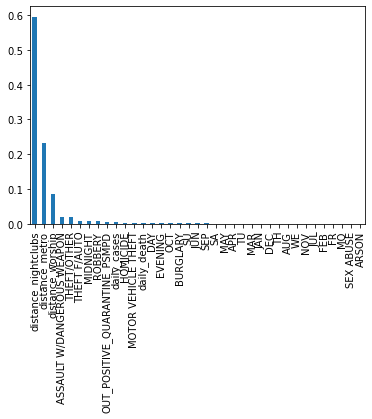

In [9]:
importance = pd.Series(postclf.feature_importances_, index = postDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [10]:
importance

distance_nightclubs              0.595449
distance_metro                   0.233164
distance_worship                 0.085974
ASSAULT W/DANGEROUS WEAPON       0.019676
THEFT/OTHER                      0.018935
THEFT F/AUTO                     0.007031
MIDNIGHT                         0.006958
ROBBERY                          0.006293
OUT_POSITIVE_QUARANTINE_PSMPD    0.004498
daily_cases                      0.003463
HOMICIDE                         0.003122
MOTOR VEHICLE THEFT              0.002751
daily_death                      0.002576
DAY                              0.001325
EVENING                          0.001017
OCT                              0.000763
BURGLARY                         0.000724
SU                               0.000562
JUN                              0.000517
SEP                              0.000510
SA                               0.000431
MAY                              0.000428
APR                              0.000395
TU                               0

# Predictions

In [11]:
#using pre data to predict post
y_pred = preclf.predict(post_x_test)

print(metrics.accuracy_score(post_y_test, y_pred))
pre_post = metrics.accuracy_score(post_y_test, y_pred)

0.43437970578014595


In [12]:
#using post data to predict pre
y_pred = postclf.predict(pre_x_test)

print(metrics.accuracy_score(pre_y_test, y_pred))

post_pre = metrics.accuracy_score(pre_y_test, y_pred)

0.4651686469911844


In [13]:
#using pre data to predict pre

y_pred = preclf.predict(pre_x_test)

print(metrics.accuracy_score(pre_y_test, y_pred))

pre_pre = metrics.accuracy_score(pre_y_test, y_pred)

0.45707167497125334


In [14]:
#using post data to predict post

y_pred = postclf.predict(post_x_test)
print(metrics.accuracy_score(post_y_test, y_pred))
post_post = metrics.accuracy_score(post_y_test, y_pred)

0.45939997683308237


# Combined Importances

### don't know if this is useful but I was curious

In [ ]:
combinedDF = pd.concat([preDF, postDF])

In [ ]:
combinedX = combinedDF.loc[:, combinedDF.columns != 'WARD'].values
combinedY = combinedDF['WARD'].values

(combined_x_train, combined_x_test,
 combined_y_train, combined_y_test) = train_test_split(combinedX, combinedY, test_size = .2, random_state = 12345)

combinedclf = RandomForestClassifier(n_estimators = 800, max_depth = 5)
combinedclf.fit(combined_x_train, combined_y_train.ravel())

In [ ]:
importance = pd.Series(combinedclf.feature_importances_, index = combinedDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [ ]:
count = 0

for value in importance:
    print(importance.index[count], str(value))
    count += 1

In [58]:
#combined

y_pred = combinedclf.predict(combined_x_test)

print(metrics.accuracy_score(combined_y_test, y_pred))

0.4561938654465345


# Results

In [17]:
print('Precovid predicting covid accuracy', str(pre_post))
print('Covid predicting precovid accuracy', str(post_pre))
print('Precovid predicting precovid accuracy', str(pre_pre))
print('Covid predicting covid accuracy', str(post_post))

Precovid predicting covid accuracy 0.43437970578014595
Covid predicting precovid accuracy 0.4651686469911844
Precovid predicting precovid accuracy 0.45707167497125334
Covid predicting covid accuracy 0.45939997683308237
